In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/yehorchankov/udata-school/master/hw_3_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
#test missing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
f0     40000 non-null float64
f1     40000 non-null float64
f2     40000 non-null float64
f3     40000 non-null float64
f4     40000 non-null float64
f5     40000 non-null float64
f6     40000 non-null float64
f7     40000 non-null float64
f8     40000 non-null float64
f9     40000 non-null float64
lbl    40000 non-null float64
dtypes: float64(11)
memory usage: 3.4 MB


In [4]:
data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,lbl
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.002991,0.003209,-0.002991,-0.009630,-0.002443,-0.006919,0.008981,-0.002443,0.012763,0.005384,1.499500
std,0.555049,0.669027,0.555049,1.473199,0.792873,1.000283,1.320918,0.792873,1.453225,1.324047,1.117668
min,-1.905599,-3.160811,-1.905599,-5.414462,-3.210632,-3.933070,-6.372736,-3.210632,-4.788817,-4.911375,0.000000
25%,-0.349748,-0.555245,-0.349748,-1.062237,-0.556013,-0.688123,-1.007493,-0.556013,-1.036148,-1.024616,1.000000
50%,-0.073417,0.037319,-0.073417,0.075740,0.081158,-0.009233,0.009509,0.081158,0.053543,0.036987,1.000000
75%,0.424013,0.531874,0.424013,1.045986,0.494282,0.671744,1.041563,0.494282,1.071657,1.014510,2.000000
max,2.782764,2.263375,2.782764,5.027650,2.735036,4.492202,4.276321,2.735036,5.395193,5.353837,3.000000


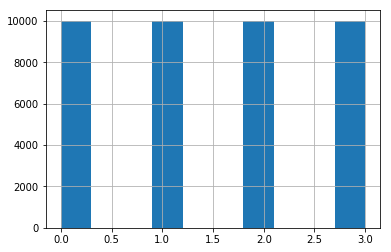

In [5]:
#balance
data.lbl.hist()

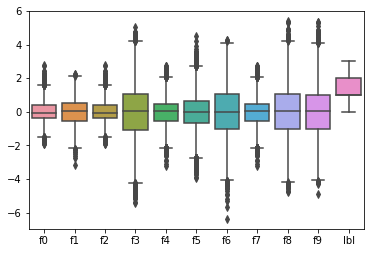

In [6]:
sn.boxplot(data=data)

In [7]:
data_out = data[['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9']]
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1
IQR

f0    0.773761
f1    1.087119
f2    0.773761
f3    2.108223
f4    1.050294
f5    1.359867
f6    2.049056
f7    1.050294
f8    2.107805
f9    2.039127
dtype: float64

In [8]:
# check shape before
data_out.shape

(40000, 10)

In [9]:
df_outliers =data[~((data_out < (Q1 - 1.5 * IQR)) |(data_out > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
df_outliers.shape

(39179, 11)

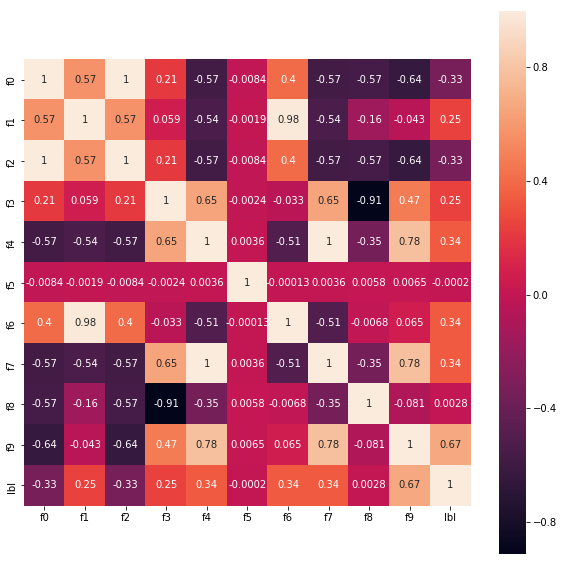

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(data.corr(),annot=True,square=True)

In [12]:
# drop f1,f2,f4 cuz of higt corr with other variables
#drop f5,f8 cuz of very low corr with target
data_corre = data[['f0','f3','f6','f7','f9','lbl']]

## Classification

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
def get_data(data):
    targets = data['lbl'].astype('category')
    df = data.drop(['lbl'],1)
    
    X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.4, random_state=100)
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = get_data(data_corre)

### SVM

In [17]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred =clf.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.86      0.85      0.85      3979
        1.0       0.87      0.87      0.87      4048
        2.0       0.89      0.87      0.88      4044
        3.0       0.85      0.89      0.87      3929

avg / total       0.87      0.87      0.87     16000



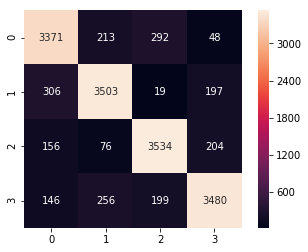

In [20]:
mat = confusion_matrix(y_test, y_pred)
sn.heatmap(mat.T,square=True,annot=True, fmt='d')

### DecisionTree

In [21]:
clf = DecisionTreeClassifier(random_state=0)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
y_pred =clf.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.82      0.83      0.82      3979
        1.0       0.85      0.85      0.85      4048
        2.0       0.87      0.85      0.86      4044
        3.0       0.84      0.85      0.85      3929

avg / total       0.85      0.85      0.85     16000



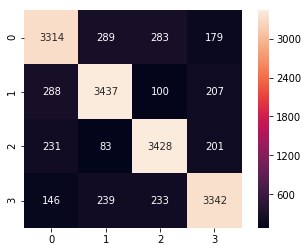

In [24]:
mat = confusion_matrix(y_test, y_pred)
sn.heatmap(mat.T,square=True,annot=True, fmt='d',)

### Tuning param

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

#### SVM

In [26]:
def sample_loss(params):
    C = float(params[0])
    gamma = float(params[1])
    kernel = str(params[2])
    
    model = SVC(C=10 ** C, gamma=10 ** gamma, kernel=kernel, random_state=42)
    
    return cross_val_score(estimator=model,X=X_train,y=y_train,cv=3).mean()

In [49]:
lambdas = np.linspace(0, -3, 5)
gammas = np.linspace(0.5, -4, 3)
kernels = ['rbf','sigmoid']

In [50]:
param_grid = np.array([[C, gamma, ker] for gamma in gammas for C in lambdas for ker in kernels])

In [51]:
len(param_grid)

30

In [52]:
real_loss = [sample_loss(params) for params in param_grid]

In [53]:
param_grid[np.array(real_loss).argmax(), :]

array(['0.0', '0.5', 'rbf'], dtype='<U32')

#### Try best param
score up by 2%

In [55]:
clf = SVC(C = 1, gamma=10 ** 0.5)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3.1622776601683795,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred =clf.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.87      0.87      0.87      3979
        1.0       0.89      0.89      0.89      4048
        2.0       0.89      0.91      0.90      4044
        3.0       0.90      0.88      0.89      3929

avg / total       0.89      0.89      0.89     16000



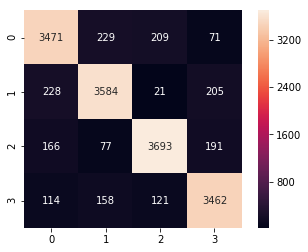

In [57]:
mat = confusion_matrix(y_test, y_pred)
sn.heatmap(mat.T,square=True,annot=True, fmt='d')

#### DecisionTree
score up by 2%

In [62]:
from sklearn.model_selection import GridSearchCV

rf_params = { 
    'min_samples_leaf': [2, 3,4],
    'max_features': ['auto', 'log2'],
    'max_depth':np.arange(5,15,1)
}

gs_random = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=rf_params, cv= 5)
gs_random.fit(X_train, y_train)
print (gs_random.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2}


In [63]:
clf = DecisionTreeClassifier(max_depth=10,max_features='auto',min_samples_leaf=2,random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [64]:
y_pred =clf.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.85      0.84      0.85      3979
        1.0       0.85      0.89      0.87      4048
        2.0       0.88      0.89      0.89      4044
        3.0       0.90      0.86      0.88      3929

avg / total       0.87      0.87      0.87     16000



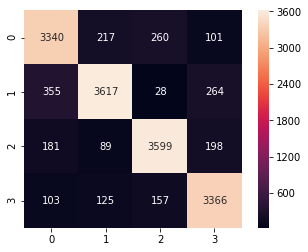

In [65]:
mat = confusion_matrix(y_test, y_pred)
sn.heatmap(mat.T,square=True,annot=True, fmt='d',)

### Clustering

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

In [36]:
clas = df_outliers['lbl']
df = df_outliers.drop(['lbl'],1)

In [37]:
X = StandardScaler().fit_transform(df)

In [38]:
from sklearn.neighbors import NearestNeighbors

In [39]:
nbrs = NearestNeighbors(n_neighbors=2).fit(X)

In [40]:
distan = nbrs.kneighbors(X)[0][:,1]

(array([9.9360e+03, 2.1371e+04, 5.9430e+03, 1.3550e+03, 4.0500e+02,
        1.0300e+02, 3.4000e+01, 2.2000e+01, 6.0000e+00, 4.0000e+00]),
 array([0.0183257 , 0.15775019, 0.29717469, 0.43659919, 0.57602369,
        0.71544819, 0.85487268, 0.99429718, 1.13372168, 1.27314618,
        1.41257067]),
 <a list of 10 Patch objects>)

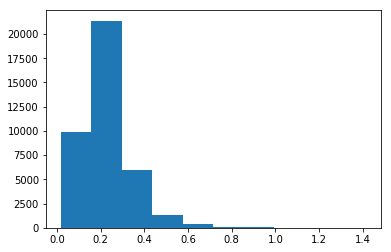

In [41]:
plt.hist(distan)

choose eps = 0.86

In [42]:
from scipy.spatial.distance import cdist
from scipy.spatial import ckdtree
import numpy as np

In [43]:
tree = ckdtree.cKDTree(X)

In [44]:
pairs = tree.query_pairs(0.86)

In [45]:
pairs_arr = np.array(list(pairs))

(array([1.8692e+04, 8.4110e+03, 4.9640e+03, 3.2370e+03, 1.9420e+03,
        1.1140e+03, 5.1500e+02, 1.9500e+02, 6.0000e+01, 1.4000e+01]),
 array([  0. ,  56.1, 112.2, 168.3, 224.4, 280.5, 336.6, 392.7, 448.8,
        504.9, 561. ]),
 <a list of 10 Patch objects>)

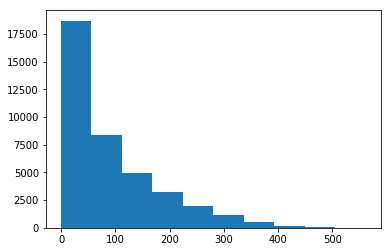

In [46]:
plt.hist(np.bincount(pairs_arr[:,0]))

In [85]:
db = DBSCAN(eps=0.86, min_samples=60).fit(X)

In [86]:
labels = db.labels_

In [87]:
davies_bouldin_score(X,db.labels_)

NameError: name 'davies_bouldin_score' is not defined

In [88]:
fowlkes_mallows_score(clas,db.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


18728.955152085447

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(n_components=2,random_state=15)

In [51]:
T2 = tsne.fit_transform(X)

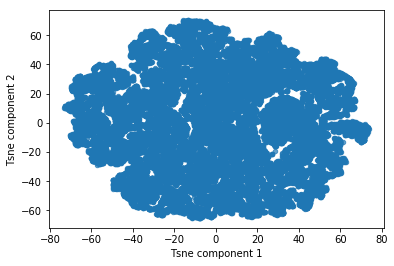

In [53]:
T2 = pd.DataFrame(T2)
T2.columns = ['Tsne component 1', 'Tsne component 2']
T2.plot.scatter(x='Tsne component 1', y='Tsne component 2', marker='o',alpha=0.7)

In [89]:
unique_labels = set(labels)
unique_labels

{-1, 0}

In [90]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

In [91]:
col = dict(zip(np.unique(labels), colors))
label_color = [col[i] for i in labels]

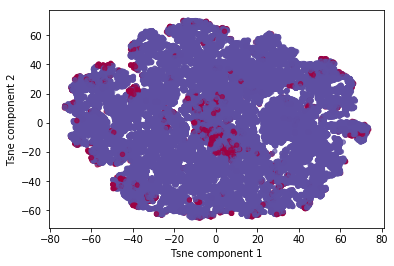

In [92]:
T2.plot.scatter(x='Tsne component 1', y='Tsne component 2', marker='o',alpha=0.7,color=label_color)

In [93]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [64]:
from sklearn.metrics import *

In [ ]:
fowlkes_mallows_score()

In [61]:
from sklearn.metrics import davies_bouldin_score, fowlkes_mallows_score

ImportError: cannot import name 'davies_bouldin_score'

In [ ]:
davies_bouldin_score(X,kmeans.labels_)

In [66]:
fowlkes_mallows_score(clas,kmeans.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


nan

In [67]:
labels = kmeans.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
col = dict(zip(np.unique(labels), colors))
label_color = [col[i] for i in labels]

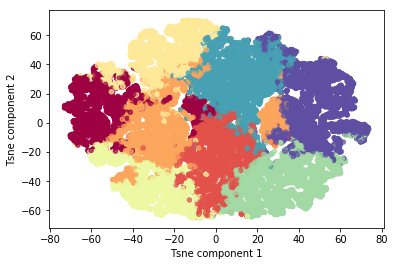

In [68]:
T2.plot.scatter(x='Tsne component 1', y='Tsne component 2', marker='o',alpha=0.7,color=label_color)